In [1]:
import pandas as pd
import numpy as np

In [4]:
books=pd.read_csv("Books.csv")
books.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6340\1183612970.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users=pd.read_csv("Users.csv")
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings=pd.read_csv("raintingbook (1).csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
ratings["User-ID"].value_counts()


(105283,)

In [13]:
x=ratings["User-ID"].value_counts()>200      #users rated more than 200 books
x[x].shape

(899,)

In [15]:
y=x[x].index     #index(id) of users who rated more  than 200 books
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [17]:
ratings=ratings[ratings['User-ID'].isin(y)]
ratings.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [19]:
rating_and_book=ratings.merge(books,on="ISBN")
rating_and_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [21]:
numrarting=rating_and_book.groupby('Book-Title')['Book-Rating'].count().reset_index()
numrarting.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [27]:
numrarting.rename(columns={'Book-Rating':'num_rating'},inplace=True)
numrarting.head()

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [28]:
final_rating=rating_and_book.merge(numrarting,on="Book-Title")

In [29]:
final_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,num_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82


In [30]:
final_rating=final_rating[final_rating["num_rating"]>=50]

In [35]:
final_rating.drop_duplicates(['User-ID','Book-Title'],inplace=True)

In [82]:
final_rating.shape
final_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,num_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,82


In [37]:
# book_pivot=final_rating.pivot_table(index=['Book-Title'],columns=['User-ID'],values="Book-Rating")

In [38]:
# book_pivot.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN


In [41]:
# book_pivot.fillna(0,inplace=True)

In [42]:
# book_pivot.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


In [43]:
from fastai.collab import *

In [44]:
dls = CollabDataLoaders.from_df(final_rating, item_name='Book-Title', bs=64)
dls.show_batch()
     

,User-ID,Book-Title,Book-Rating
0,181176,Outlander,0
1,52584,The Tale of the Body Thief (Vampire Chronicles (Paperback)),0
2,59172,Sole Survivor,0
3,87555,"The Two Towers (The Lord of the Rings, Part 2)",10
4,38023,The Color of Water: A Black Man's Tribute to His White Mother,10
5,137589,Naked,0
6,250184,Moo,0
7,44296,The Firm,0
8,240568,Back Roads,0
9,46398,Jewel (Oprah's Book Club),0


In [45]:
dls.classes

{'User-ID': ['#na#', 254, 2276, 2766, 2977, 3363, 3757, 4017, 4385, 6242, 6251, 6323, 6543, 6563, 6575, 7158, 7286, 7346, 7915, 8067, 8245, 8681, 8936, 9856, 10447, 10819, 11601, 11676, 11993, 12538, 12824, 12982, 13082, 13273, 13552, 13850, 14422, 14521, 15408, 15418, 15957, 16106, 16634, 16795, 16916, 16966, 17950, 18067, 18401, 19085, 19664, 20115, 20201, 21014, 21252, 21576, 21659, 22625, 23288, 23768, 23872, 23902, 24194, 24921, 25409, 25601, 25981, 26516, 26535, 26544, 26583, 26593, 27617, 27647, 28204, 28360, 28523, 28591, 28634, 29259, 29855, 30276, 30487, 30509, 30511, 30533, 30711, 30735, 30972, 31315, 31391, 31556, 31826, 31846, 32195, 32440, 32721, 32773, 33974, 35050, 35433, 35836, 35857, 35859, 36606, 36609, 36836, 36907, 37567, 37712, 37950, 38023, 38273, 38556, 38781, 39281, 39467, 39616, 39646, 39773, 40889, 40943, 41084, 41841, 42400, 42914, 43246, 43806, 43842, 44296, 44595, 44728, 46398, 47316, 48494, 49109, 49460, 49889, 50225, 50547, 50730, 51094, 51350, 51386, 51

epoch,train_loss,valid_loss,time
0,13.794973,14.123963,00:35
1,10.806856,13.551564,00:27
2,7.844420,13.452740,00:33


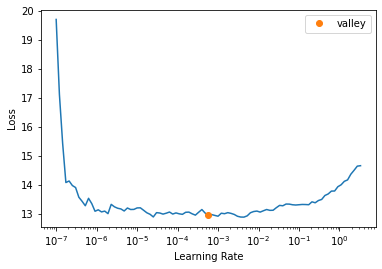

In [130]:
learn = collab_learner(dls, n_factors=500, y_range=(0, 5))
# learn.fit_one_cycle(10, 5e-3, wd=0.1,)
sugg_lr=learn.lr_find()
print(f"sugg :{sugg_lr.valley:.2e}")      #find the learning rate
learn.fit_one_cycle(3,2.75e-02)    #train just the head



epoch,train_loss,valid_loss,time
0,2.862728,12.410888,00:21
1,2.889220,12.402611,00:25
2,3.054276,12.393794,00:35
3,2.713049,12.374264,00:27
4,2.865705,12.362154,00:37
5,3.093990,12.334514,00:30
6,2.912152,12.303450,00:40
7,2.922721,12.281077,00:27
8,2.943982,12.253831,00:22
9,2.980674,12.230502,00:21


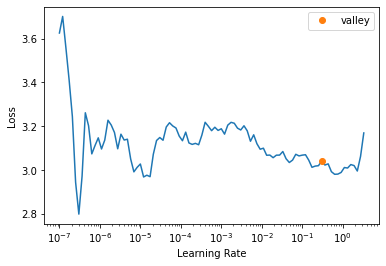

In [138]:
learn.unfreeze()
learn.lr_find()
print(f"sugg :{sugg_lr.valley:.2e}")  
learn.fit_one_cycle(80,lr_max=slice(1e-4,1e-2))

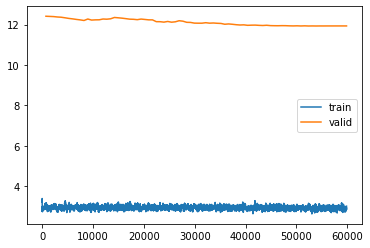

In [139]:
# booknames=final_rating["Book-Title"].unique()
# bk=dls.classes['Book-Title']
# idx = dls.classes['Book-Title'].o2i["1984"]
# idx

# book_bias = learn.model.i_weight.weight
# idx = dls.classes['Book-Title'].o2i['1984']
# distances = torch.nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
# idx = distances.argsort(descending=True)[:5]
# dls.classes['Book-Title'][idx]
learn.recorder.plot_loss()

In [209]:
import torch
def recoomandbook(bookname):
        
       book_bias = learn.model.i_weight.weight
       idx = dls.classes['Book-Title'].o2i[bookname]
       distances = torch.nn.CosineSimilarity(dim=1)(book_bias, book_bias[idx][None])
       idx = distances.argsort(descending=True)[:5]
       for i in idx:
        print (dls.classes['Book-Title'][i])

In [210]:
recoomandbook('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Goblet of Fire (Book 4)


In [142]:
import pickle
pickle.dump(final_rating,open('bookdata.pkl','wb'))

In [151]:
numrarting.head()

,Book-Title,num_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1


In [154]:
avg=rating_and_book.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg.rename(columns={'Book-Rating':"avg"},inplace=True)
avg.head()

,Book-Title,avg
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4.5
1,Always Have Popsicles,0.0
2,Apple Magic (The Collector's series),0.0
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.0
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),0.0


In [170]:
popularbooks=numrarting.merge(avg,on="Book-Title")
popularbooks.head()
popularbooks=popularbooks[popularbooks['num_rating']>=200].sort_values('avg',ascending=False)
popularbooks=popularbooks.merge(rating_and_book,on='Book-Title').drop_duplicates("Book-Title")
popularbooks=popularbooks[['Book-Title','num_rating','Book-Author','Image-URL-M','avg','Book-Rating']]
popularbooks.head()
popularbooks.shape

(16, 6)

In [171]:
pickle.dump(popularbooks,open('popularbooks.pkl','wb'))

array(['The Lovely Bones: A Novel', 'The Da Vinci Code',
       'The Secret Life of Bees', "Bridget Jones's Diary", 'The Firm',
       'A Time to Kill', 'The Notebook', 'The Nanny Diaries: A Novel',
       'The Pelican Brief', 'A Painted House', 'Snow Falling on Cedars',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       "The Girls' Guide to Hunting and Fishing", 'The Horse Whisperer',
       'Message in a Bottle', 'Wild Animus'], dtype=object)

In [174]:
learn.export()

In [214]:
final_rating['Book-Title']

0         Politically Correct Bedtime Stories: Modern Tales for Our Life and Times
1         Politically Correct Bedtime Stories: Modern Tales for Our Life and Times
2         Politically Correct Bedtime Stories: Modern Tales for Our Life and Times
3         Politically Correct Bedtime Stories: Modern Tales for Our Life and Times
4         Politically Correct Bedtime Stories: Modern Tales for Our Life and Times
                                            ...                                   
236701                                                            And Then You Die
236702                                                            And Then You Die
236703                                                            And Then You Die
236704                                                            And Then You Die
236705                                                            And Then You Die
Name: Book-Title, Length: 59850, dtype: object

array(['George Orwell'], dtype=object)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
